In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scinum import scinum as sn
from scipy.optimize import curve_fit
import pandas as pd
import scipy
plt.style.use('ggplot')

class dataa:
    def __init__(self, filename = None):
        self.filename = filename if filename else None
        self.data = pd.read_csv(filename, delimiter= ',', header = 0) if filename else None

    def show(self):
        return self.data

    def linear(self, dy = 0, dx = 0, title = "", ylabel = "", xlabel = "", yname = "", xname = ""):        
        Y = sn(np.transpose([self.data[yname], dy]))        
        X = sn(self.data[xname], uncer = dx)
        
        x = sn.f(self.up, X)
        y = sn.f(self.down, Y)
        z, cov = np.polyfit(x.n, y.n, 1, w= 1/y.u**2, cov = True)
        p = np.poly1d(z)
        
        self.get_chisq(x.n,y.n,dy,*z, mode = "linear")
        
        plt.rcParams.update({'font.size': 11})
        fig = plt.figure(dpi = 300, figsize = (7,2.5))
        plt.title(title, fontsize = 16)
        plt.ylabel(ylabel, fontsize = 14)
        plt.errorbar(x.n, y.n, yerr = y.u, xerr = x.u, fmt = '.')
        plt.plot(x.n, p(x.n))
        plt.legend(fontsize = 10)
        ax1 = fig.add_axes((.124,-.1,.775,.2))
        ax1.errorbar(x.n, y.n - p(x.n), yerr = y.u, xerr = x.u, label = 'Residuals', fmt = '.')
        ax1.set_xlabel(xlabel, fontsize = 14)
        plt.show()
        
        return z, np.sqrt(np.diag(cov))
        
    def nonlinear(self, f = None, dy = 0, dx = 0, title = "", ylabel = "", xlabel = "", yname = "", xname = "", p0 = None):
        
        Y = sn(self.data[yname], uncer = dy)        
        X = sn(self.data[xname], uncer = dx)
        
        x = sn.f(self.up, X)
        y = sn.f(self.down, Y)
        
        best_params, fit_cov = curve_fit(f, x.n, y.n, p0)
        print(best_params)

        self.get_chisq(x.n,y.n,dy,f, best_params, mode = "nonlinear")

        fit = [f(j, *best_params) for j in x.n]

        plt.rcParams.update({'font.size': 11})
        fig = plt.figure(dpi = 300, figsize = (7,3))
        plt.title(title, fontsize = 16)
        plt.ylabel(ylabel, fontsize = 14)
        plt.errorbar(x.n, y.n, yerr = y.u, xerr = x.u, fmt = '.', label = 'Data')
        plt.plot(x.n, fit, label = 'Fit')
        plt.legend(fontsize = 10)
        ax1 = fig.add_axes((.124,-.1,.775,.2))
        ax1.errorbar(x.n, fit - y.n, yerr = y.u, xerr = x.u, label = 'Residuals', fmt = '.')
        ax1.set_xlabel(xlabel, fontsize = 14)
        plt.show()
        
        return best_params, np.sqrt(np.diag(fit_cov))

    def hist(self, label, bins = None):
        plt.hist(self.data[label], bins = bins)
        plt.xlabel(label)
        plt.ylabel('Count')
    
    def up(self, u):
        return u
    
    def down(self, d):
        return d
        
    def gaussian(self, x, mean, std):
        return 1/(std*np.sqrt(2*np.pi))*np.exp((-(x-mean)**2)/(2*std**2))
    
    def poisson(x, lamda, k):
        return lamda**k*np.exp(-lamda)/scipy.special.factorial(k)
    
    def get_a(self, x, y):
        return np.sum(x*y)/np.sum(x**2)

    def damped_trig(self, t, g, w, p):
        return np.exp(g*t)*np.cos(w*t+p)

    def nonlinear_chisq(self, x,y,ey,f, args):
        return np.sum((y-f(x, *args))**2/ey**2)
    
    def sinusoid(self, t, w, phi):
        return np.cos(w*t+phi)
    
    def linear_chisq(self, x,y,ey, a, b):
        return np.sum((y-a*x-b)**2/ey**2)
    
    def get_chisq(self, x,y,ey,a, b, mode = "linear"):
        if mode == "linear":
            print("Chi-Square: ", self.linear_chisq(x, y, ey, a, b))
            k = len(x) - 2
            print("degrees of freedom: ", k)
            print([k + (i+2)*np.sqrt(2*k) for i in range(3)])
            print("CHISQ FACTOR: ", self.linear_chisq(x, y, ey, a, b)/k)
        else:
            print("Chi-Square: ", self.nonlinear_chisq(x, y, ey, a, b))
            k = len(x) - len(b)
            print("degrees of freedom: ", k)
            print([k + (i+2)*np.sqrt(2*k) for i in range(3)])
            print("CHISQ FACTOR: ", self.nonlinear_chisq(x, y, ey, a, b)/k)

    def weighted_x(self, x, u):
        return np.sum(x/u**2)/(np.sum(1/u**2))

    def weighted_u(self, x, u):
        return np.sqrt(1/(np.sum(1/u**2)))


In [131]:
df1 = pd.read_csv('sample-data (1).txt')
df = np.array([k for k in df1['-76.81170'] if isinstance(k, float)])

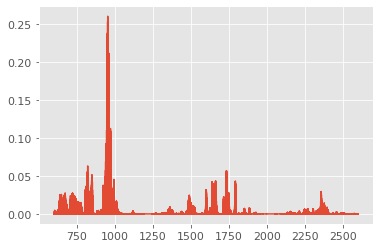

In [159]:
penis = np.linspace(600, 2599.352, len(df))
plt.plot(penis, np.power(10, df/10))
# plt.yscale('log')

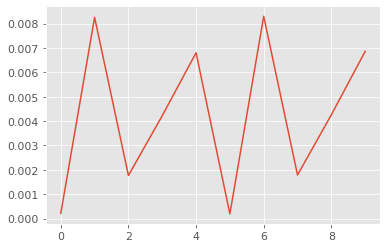

In [156]:
plt.plot(np.power(10, df/10)[300000:300010])

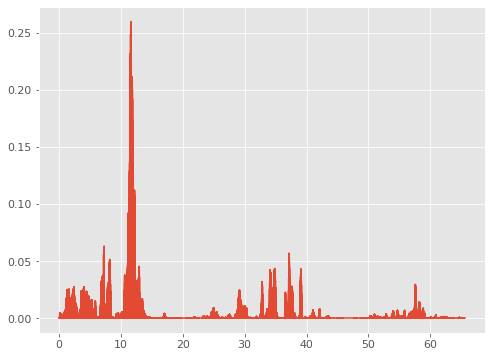

In [133]:
x = np.power(10, df/10)
t = np.arange(len(x))/8000
pts = len(x)
tmax = max(t)
t = np.linspace(0, tmax, pts)
plt.figure(figsize = (8,6))
plt.plot(t,x)

(0, 100)

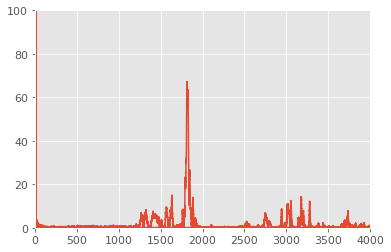

In [141]:
sp = np.fft.fft(x)
freq = np.fft.fftfreq(n = pts, d = tmax/pts)
plt.plot(freq, abs(sp))
plt.xlim([0,4000])
plt.ylim([0, 100])
# plt.plot(freq, sp.imag)

[-1.2         1.57079633]
Chi-Square:  4.001411366603436e-21
degrees of freedom:  5998
[6217.052505121489, 6326.578757682234, 6436.105010242978]
CHISQ FACTOR:  6.671242691903027e-25


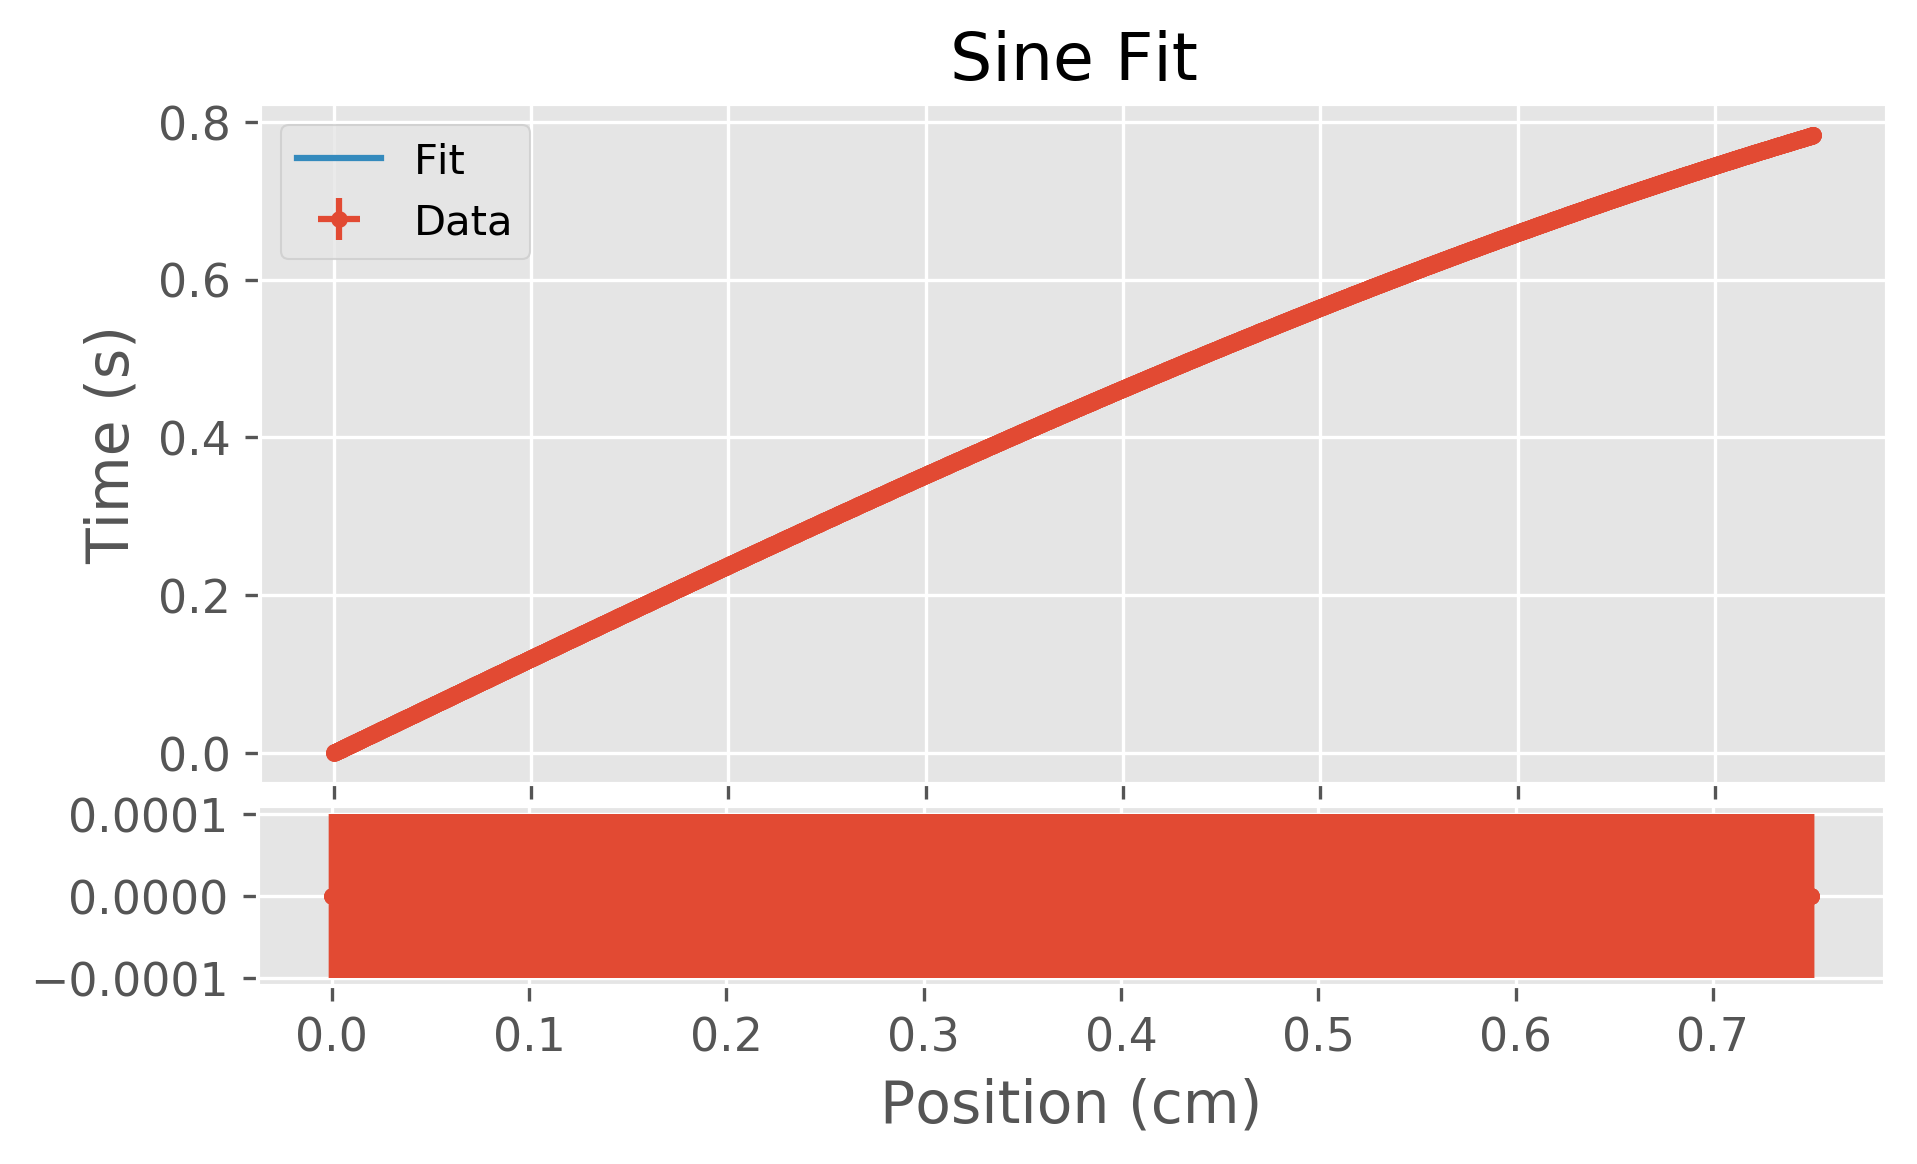

(array([-1.2       ,  1.57079633]), array([5.84929553e-18, 2.23521303e-18]))

In [72]:
d = dataa()
d.data = {'x': np.sin(t*1.2), 't': t}
d.nonlinear(f = d.sinusoid, dy = 0.0001, dx = 0, title = "Sine Fit", ylabel = "Time (s)", xlabel = "Position (cm)", yname = "x", xname = "t", p0 = None)

(0, 2)

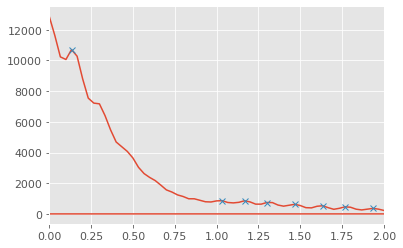

In [113]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(abs(sp))
np.diff(peaks)
plt.plot(freq, abs(sp))
plt.plot(freq[peaks], abs(sp)[peaks], "x")
plt.xlim([0,2])

In [6]:
peaks = peaks[freq[peaks] > 0]

In [7]:
print("average peak distance and standard deviation: ", np.mean(np.diff(peaks)), np.std(np.diff(peaks), ddof = 1))

average peak distance and standard deviation:  3.0 1.1094003924504583


c:\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


Chi-Square:  15.934680166099007
degrees of freedom:  12
[21.79795897113271, 26.696938456699066, 31.595917942265423]
CHISQ FACTOR:  1.327890013841584


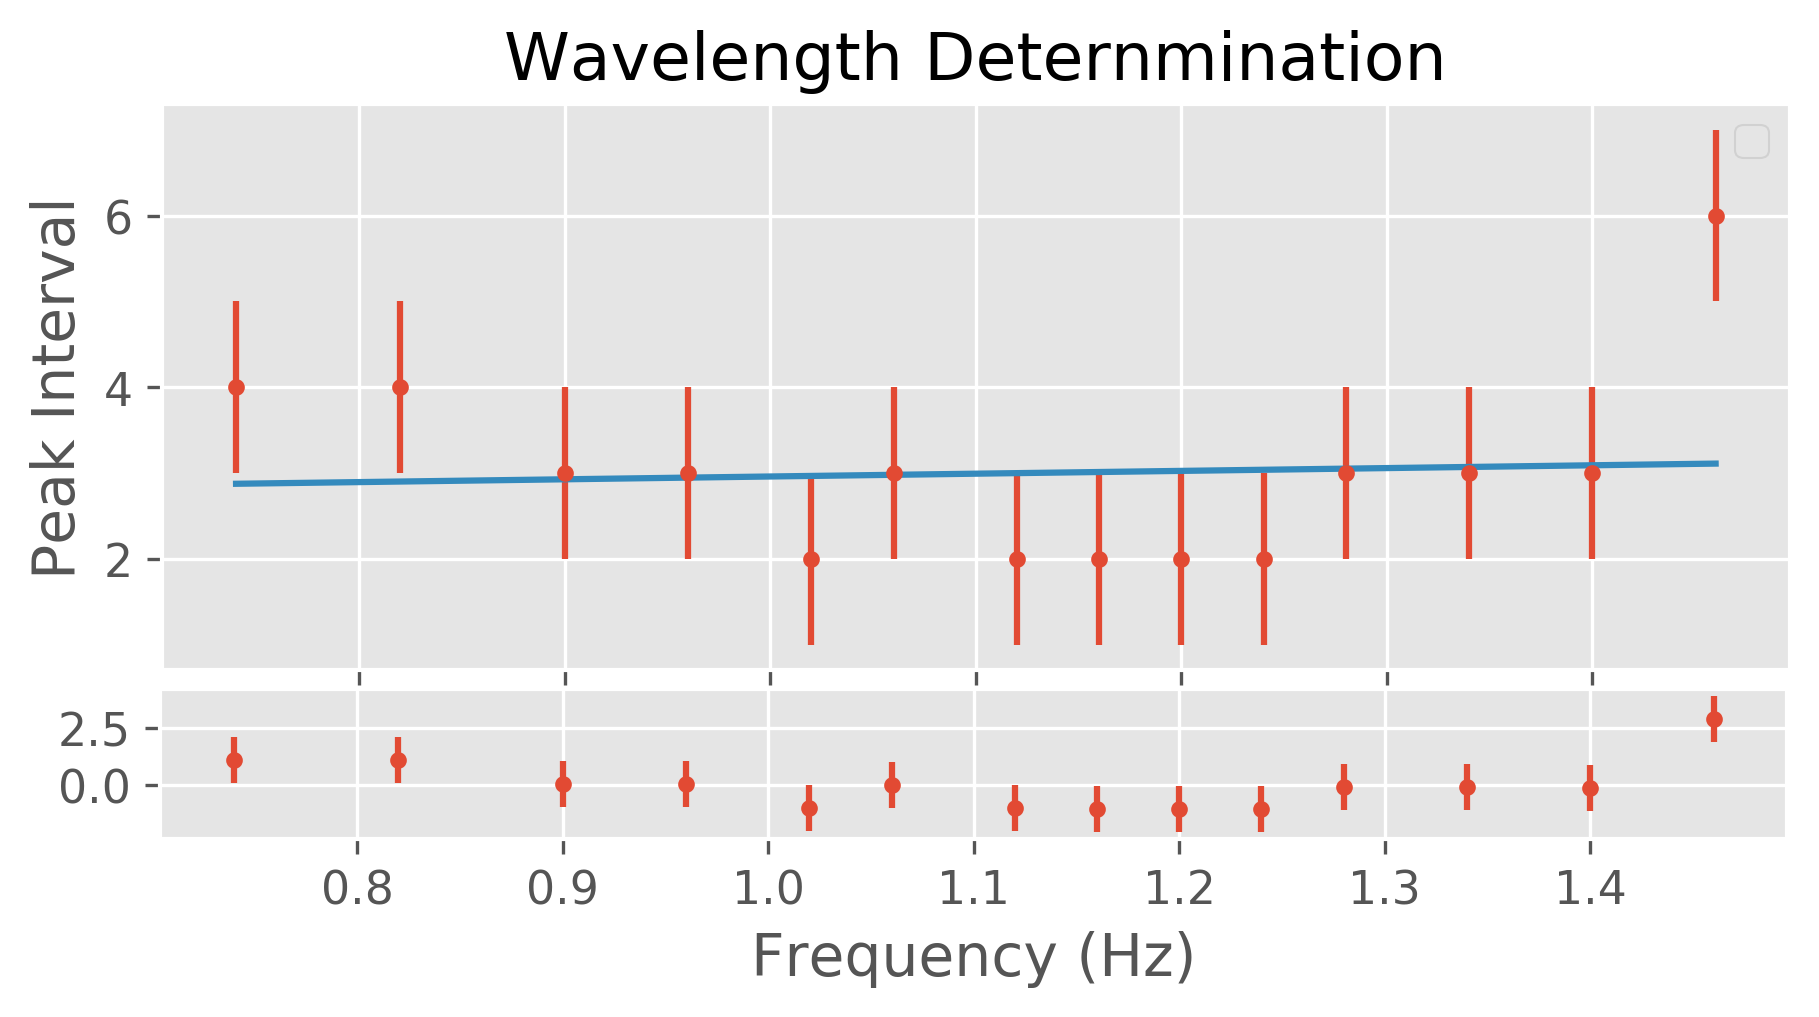

(array([0.32659917, 2.63374236]), array([1.47256201, 1.67984596]))

In [8]:
l = dataa()
l.data = {'freq': freq[peaks][:-1], 'isi': np.diff(peaks)}
l.linear(dy = 1, dx = 0, title = "Wavelength Deternmination", ylabel = "Peak Interval", xlabel = "Frequency (Hz)", yname = "isi", xname = "freq")

No handles with labels found to put in legend.


Chi-Square:  2.1186440670837237
degrees of freedom:  4
[9.65685424949238, 12.485281374238571, 15.313708498984761]
CHISQ FACTOR:  0.5296610167709309


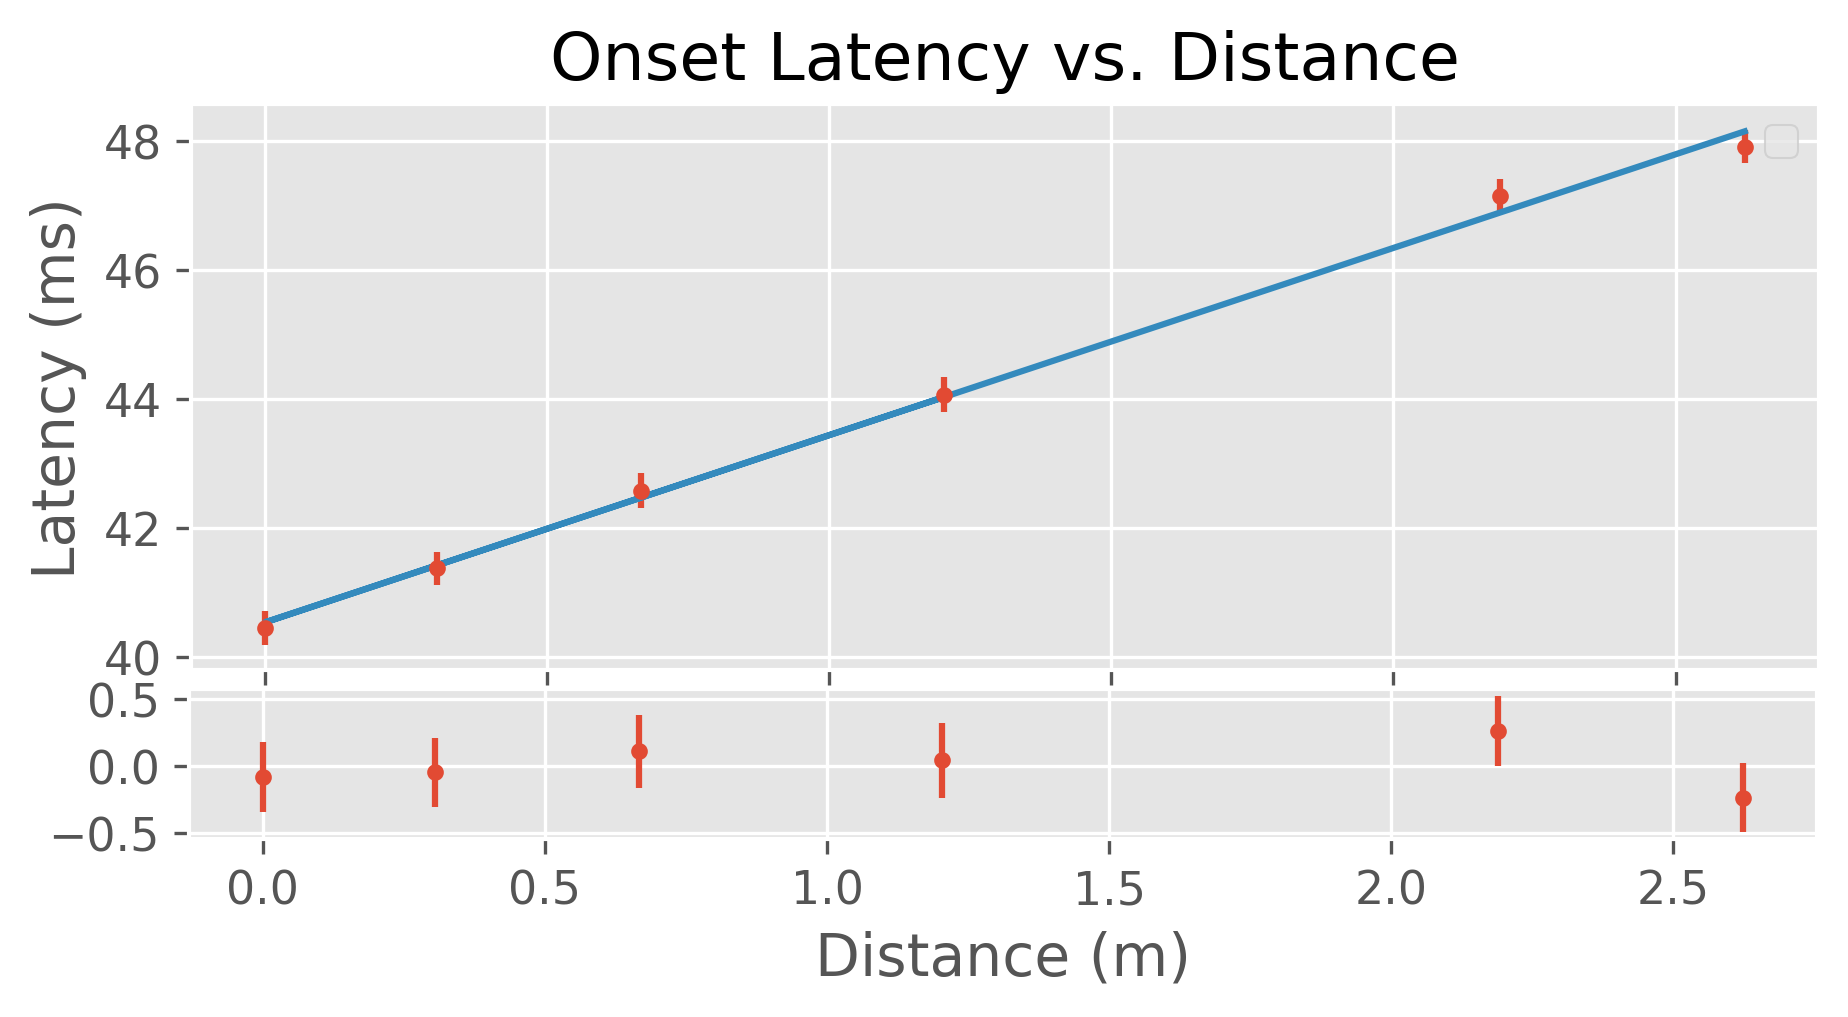

In [9]:
d = [
    2.6226,
    2.1895,
    0.0007, 
    0.3048, 
    0.6668, 
    1.2033
]

d = np.array(d)

full_t = [
    [384, 385, 383, 384, 382, 383, 384, 382, 382, 383, 384],
    [377, 377, 377, 378, 375, 379, 377, 377, 376, 379, 377],
    [323, 325, 323, 324, 324, 323, 326, 322, 323, 324, 323],
    [331, 330, 331, 331, 331, 332, 330, 331, 333, 331, 330],
    [340, 341, 341, 337, 340, 341, 341, 343, 341, 342, 340],
    [355, 351, 355, 352, 351, 353, 350, 352, 351, 354, 354]
         ]

def get_err(x):
    return np.sqrt(2**2+np.std(x, ddof = 1)**2/np.sqrt(len(x)))

t = np.mean(full_t, axis = 1)/8000
dt = np.array([get_err(t)/8000 for t in full_t])

k = dataa()
k.data = {'d': d, 't': t*1000}
params, err = k.linear(dy = dt*1000, dx = 0, title = "Onset Latency vs. Distance", ylabel = "Latency (ms)", xlabel = "Distance (m)", yname = "t", xname = "d")

In [10]:
v = sn([params[0]], err[0])
v.pr()

[[2.90110524 0.08040582]]


In [11]:
err[1]

0.12303674989240711

In [12]:
def inv(x):
    return 1/x

sn.f(inv, v).pr()

[[0.34469622 0.00955345]]


In [13]:
true = 344.82
true

344.82

3


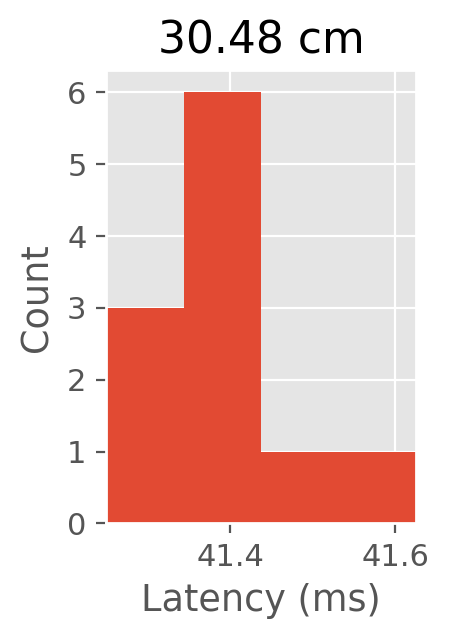

In [14]:
def hist(xdata):
        fig = plt.figure(dpi = 200, figsize = (2,3))
        print(int(10*(np.max(xdata) - np.min(xdata))))
        plt.hist(xdata, bins = int(10*(np.max(xdata) - np.min(xdata))) + 1, range = (np.min(xdata), np.max(xdata)))
        plt.xlabel('Latency (ms)')
        plt.ylabel('Count')
        plt.xlim([np.min(xdata), np.max(xdata)])
        plt.title("30.48 cm")
        
hist(np.array(full_t[3])/8)

In [15]:
t

array([0.04790909, 0.04714773, 0.04045455, 0.041375  , 0.04257955,
       0.04406818])

In [16]:
dt

array([0.00025942, 0.00026253, 0.00026155, 0.00025743, 0.00027041,
       0.00027745])